In [1]:
import tensorflow as tf

print("Verfügbare GPUs:", tf.config.list_physical_devices('GPU'))


2025-05-27 06:13:19.380901: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 06:13:19.392565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748326399.405984   19614 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748326399.410661   19614 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748326399.420285   19614 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Verfügbare GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/opt/anaconda3/envs/deeplearning-env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    50,331,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,366,735 (192.13 MB)

 Trainable params: 50,366,735 (192.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-06-09 16:23:12.762359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.0633 - loss: 319.5398 - val_accuracy: 0.0000e+00 - val_loss: 1077.7538
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0832 - loss: 477.5384 - val_accuracy: 0.0000e+00 - val_loss: 872.8372
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1010 - loss: 205.8028 - val_accuracy: 0.0000e+00 - val_loss: 853.3635
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0966 - loss: 161.0641 - val_accuracy: 0.0000e+00 - val_loss: 559.2202
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1422 - loss: 107.1017 - val_accuracy: 0.0000e+00 - val_loss: 524.1827
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.2310 - loss: 80.7628 - val_accuracy: 0.0000e+00 - val_loss: 335.2805
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.1634 - loss: 67.6405 - val_accuracy: 0.0000e+00 - val_loss: 328.6696
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.21

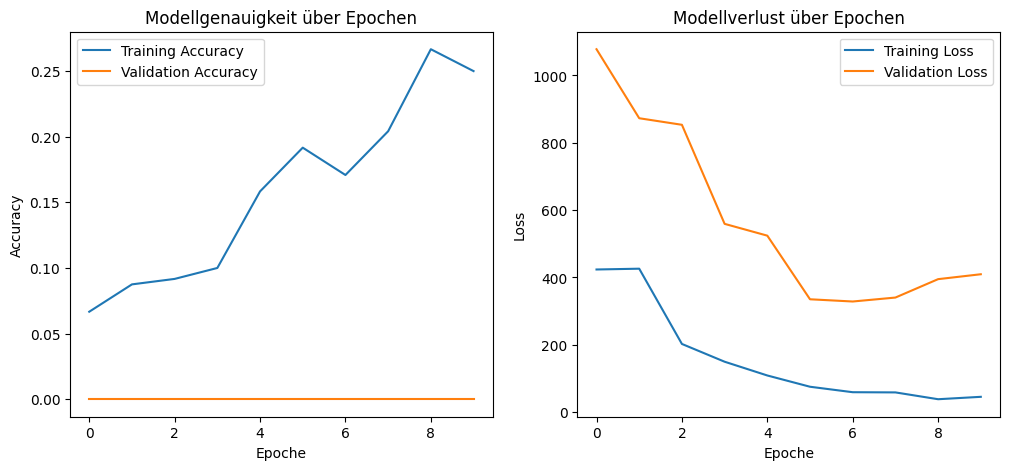

In [3]:
#Einfaches Model

import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import PIL.Image as Image
import os
import random
import matplotlib.pyplot as plt
from pathlib import Path

# **Parameter-Einstellungen**
CSV_FILE = "../data/image_data_rel.csv"
ORIGINAL_IMG_SIZE = (256, 256)  # Originalbildgröße
TARGET_IMG_SIZE = (256, 256)  # Zielgröße nach Resize
IMAGES_PER_LABEL = 20  # Anzahl Bilder pro Label
EPOCHS = 10  # Anzahl der Trainings-Epochen
BATCH_SIZE = 20  # Batch-Size fürs Training
VALIDATION_SPLIT = 0.2  # Anteil der Daten für Validierung

# **GPU auswählen**
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

# **CSV-Datei einlesen**
df = pd.read_csv(CSV_FILE)

# **Labels in numerische Werte umwandeln**
labels = sorted(df["label"].unique())  
label_map = {label: idx for idx, label in enumerate(labels)}

# **Daten vorbereiten**
X = []
y = []

project_root = Path().resolve().parent

for label in labels:
    images = df[df["label"] == label]["url"].tolist()
    
    # Genau `IMAGES_PER_LABEL` Bilder pro Label auswählen (falls weniger vorhanden, alle nehmen)
    selected_images = random.sample(images, min(len(images), IMAGES_PER_LABEL))
    
    for rel_path in selected_images:
        image_path = project_root / "data" / rel_path
        
        try:
            img = Image.open(image_path).convert("RGB")  
            img = img.resize(TARGET_IMG_SIZE)  # **Resize auf 80x80**
            img_array = np.array(img) / 255.0  # Skalierung auf [0,1]
            
            X.append(img_array)
            y.append(label_map[label])  
        
        except Exception as e:
            print(f"Fehler beim Laden von {image_path}: {e}")

# **In NumPy-Arrays umwandeln**
X = np.array(X)
y = np.array(y)

# **Deep Learning Modell mit zwei Hidden Layers**
model = models.Sequential([
    layers.Flatten(input_shape=(TARGET_IMG_SIZE[0], TARGET_IMG_SIZE[1], 3)),  
    layers.Dense(256, activation="relu"),  
    layers.Dense(128, activation="relu"),  
    layers.Dense(len(labels), activation="softmax")  
])

# **Modell zusammenfassen**
model.summary()

# **Modell kompilieren**
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# **Modell trainieren**
history = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

# **Trainingsverlauf visualisieren**
plt.figure(figsize=(12, 5))

# **Genauigkeit (Accuracy)**
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.title("Modellgenauigkeit über Epochen")
plt.legend()

# **Verlust (Loss)**
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.title("Modellverlust über Epochen")
plt.legend()

plt.show()



Trainingsdaten: 1435
Validierungsdaten: 478
Testdaten: 479


/tmp/ipykernel_20711/3490970086.py:71: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = applications.MobileNetV2(input_shape=(TARGET_IMG_SIZE[0], TARGET_IMG_SIZE[1], 3),


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,589,775 (9.88 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4161 - loss: 1.8681    

2025-05-27 06:19:59.775810: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4077', 12 bytes spill stores, 12 bytes spill loads

2025-05-27 06:19:59.874869: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4077', 8 bytes spill stores, 8 bytes spill loads

2025-05-27 06:19:59.946010: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4077_0', 184 bytes spill stores, 520 bytes spill loads

2025-05-27 06:20:00.282993: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4077', 112 bytes spill stores, 112 bytes spill loads

2025-05-27 06:20:00.602462: I extern

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4212 - loss: 1.8528

2025-05-27 06:20:10.715591: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 220 bytes spill stores, 220 bytes spill loads

2025-05-27 06:20:10.788112: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169_0', 480 bytes spill stores, 1372 bytes spill loads

2025-05-27 06:20:10.863617: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1176', 4 bytes spill stores, 4 bytes spill loads

2025-05-27 06:20:11.151524: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 8 bytes spill stores, 8 bytes spill loads

2025-05-27 06:20:11.223656: I externa

72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 256ms/step - accuracy: 0.4236 - loss: 1.8454 - val_accuracy: 0.6799 - val_loss: 0.9257
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8265 - loss: 0.5662 - val_accuracy: 0.8326 - val_loss: 0.5053
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9211 - loss: 0.3233 - val_accuracy: 0.8159 - val_loss: 0.5302
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9434 - loss: 0.2102 - val_accuracy: 0.8305 - val_loss: 0.5421
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9566 - loss: 0.1630 - val_accuracy: 0.8577 - val_loss: 0.4445
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9901 - loss: 0.0861 - val_accuracy: 0.8473 - val_loss: 0.4359
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9973 - loss: 0.0559 - val_accuracy: 0.8598 - val_loss: 0.3863
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9984 - loss: 0.0401 - val_accuracy: 0.8766 - val_loss: 

2025-05-27 06:20:35.358118: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 220 bytes spill stores, 220 bytes spill loads

2025-05-27 06:20:35.421970: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1176', 4 bytes spill stores, 4 bytes spill loads

2025-05-27 06:20:35.463689: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169_0', 480 bytes spill stores, 1372 bytes spill loads

2025-05-27 06:20:35.750871: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1169', 8 bytes spill stores, 8 bytes spill loads

2025-05-27 06:20:35.852408: I externa

15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 561ms/step - accuracy: 0.8516 - loss: 0.4966
Test Accuracy: 0.8497
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step


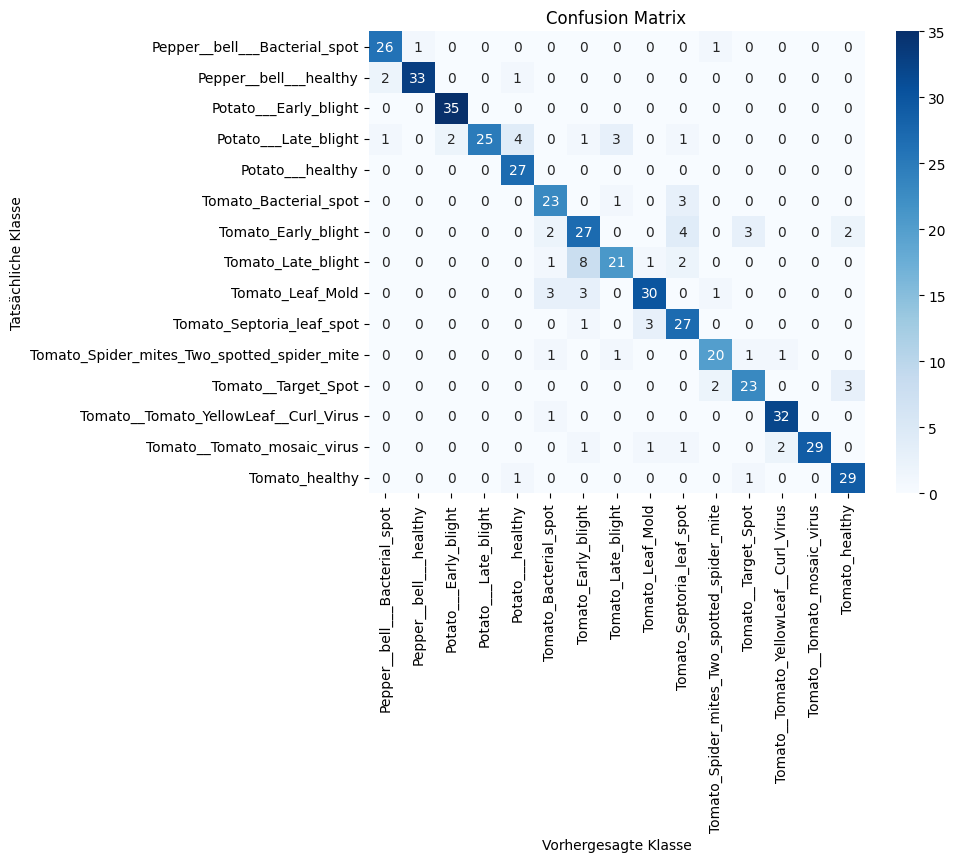

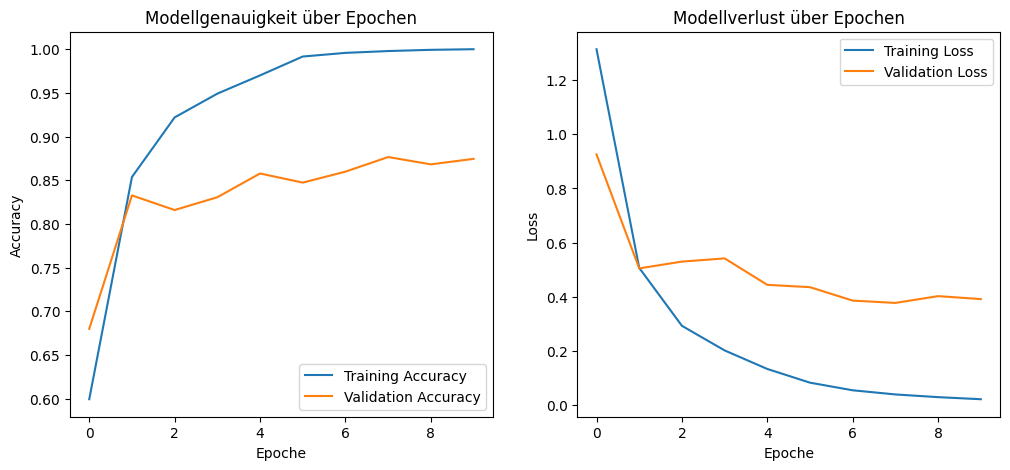

In [2]:
# MobileNetV2

import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import numpy as np
import PIL.Image as Image
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# **Parameter-Einstellungen**
CSV_FILE = "image_data.csv"
ORIGINAL_IMG_SIZE = (256, 256)  # Originalbildgröße
TARGET_IMG_SIZE = (256, 256)  # Zielgröße nach Resize
IMAGES_PER_LABEL = 160  # Anzahl Bilder pro Label
EPOCHS = 10  # Anzahl der Trainings-Epochen
BATCH_SIZE = 20  # Batch-Size fürs Training
VALIDATION_SPLIT = 0.2  # Anteil der Daten für Validierung
TEST_SPLIT = 0.2  # Anteil der Daten für Test

# **GPU auswählen**
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

# **CSV-Datei einlesen**
df = pd.read_csv(CSV_FILE)

# **Labels in numerische Werte umwandeln**
labels = sorted(df["label"].unique())  
label_map = {label: idx for idx, label in enumerate(labels)}

# **Daten vorbereiten**
X = []
y = []

for label in labels:
    images = df[df["label"] == label]["url"].tolist()
    selected_images = random.sample(images, min(len(images), IMAGES_PER_LABEL))
    
    for image_path in selected_images:
        image_path = image_path.replace("file://", "")  
        
        try:
            img = Image.open(image_path).convert("RGB")  
            img = img.resize(TARGET_IMG_SIZE)  # **Resize**
            img_array = np.array(img) / 255.0  # Skalierung auf [0,1]
            
            X.append(img_array)
            y.append(label_map[label])  
        
        except Exception as e:
            print(f"Fehler beim Laden von {image_path}: {e}")

# **In NumPy-Arrays umwandeln**
X = np.array(X)
y = np.array(y)

# **Daten aufteilen: Train / Validierung / Test**
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=VALIDATION_SPLIT + TEST_SPLIT, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_SPLIT / (VALIDATION_SPLIT + TEST_SPLIT), random_state=42)

print(f"Trainingsdaten: {X_train.shape[0]}")
print(f"Validierungsdaten: {X_val.shape[0]}")
print(f"Testdaten: {X_test.shape[0]}")

# **Deep Learning Modell mit MobileNetV2**
base_model = applications.MobileNetV2(input_shape=(TARGET_IMG_SIZE[0], TARGET_IMG_SIZE[1], 3),
                                      include_top=False,
                                      weights="imagenet")

base_model.trainable = False  # **Vortrainierte Gewichte nicht trainieren (für Transfer Learning)**

model = models.Sequential([
    base_model,  
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),  
    layers.Dense(len(labels), activation="softmax")  
])

# **Modell zusammenfassen**
model.summary()

# **Modell kompilieren**
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# **Modell trainieren**
history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val))

# **Modell auf Testdaten evaluieren**
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# **Vorhersagen auf Testset**
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# **Confusion Matrix berechnen**
cm = confusion_matrix(y_test, y_pred_classes)

# **Confusion Matrix visualisieren**
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Tatsächliche Klasse")
plt.title("Confusion Matrix")
plt.show()

# **Trainingsverlauf visualisieren**
plt.figure(figsize=(12, 5))

# **Genauigkeit (Accuracy)**
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.title("Modellgenauigkeit über Epochen")
plt.legend()

# **Verlust (Loss)**
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.title("Modellverlust über Epochen")
plt.legend()

plt.show()
